In [14]:
import sys
import os

# Get the path to the project directory using the current working directory
notebook_dir = os.getcwd()
project_path = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add the project path to sys.path if it's not already present
if project_path not in sys.path:
    sys.path.append(project_path)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
csv_file = "../experiment_results.csv"
df = pd.read_csv(csv_file)
df.head()


,seed,model,dtype,mode,context_length,prediction_length,patient_id,rmse,mae,mape
0,2022,amazon-chronos-t5-tiny,float16,inference,6,6,567,22.487484,14.242832,0.104062
1,2022,amazon-chronos-t5-tiny,float16,inference,6,6,591,32.024789,22.569862,0.177585
2,2022,amazon-chronos-t5-tiny,float16,inference,6,6,552,21.655522,14.607653,0.117624
3,2022,amazon-chronos-t5-tiny,float16,inference,6,6,584,34.983891,21.229174,0.102053
4,2022,amazon-chronos-t5-tiny,float16,inference,6,6,570,25.666795,16.901292,0.073852


In [16]:
df.dtypes

seed                   int64
model                 object
dtype                 object
mode                  object
context_length         int64
prediction_length      int64
patient_id             int64
rmse                 float64
mae                  float64
mape                 float64
dtype: object

/tmp/ipykernel_65443/1786885209.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_df["rmse"] = pd.to_numeric(patient_df["rmse"])
/tmp/ipykernel_65443/1786885209.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_df["mae"] = pd.to_numeric(patient_df["mae"])
/tmp/ipykernel_65443/1786885209.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

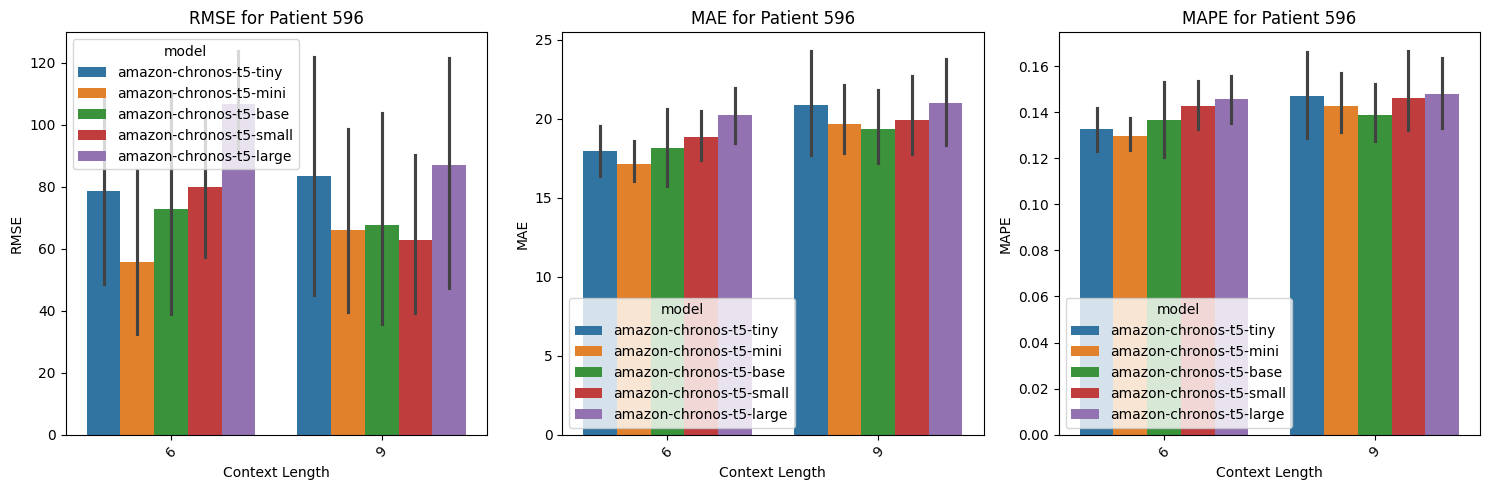

In [17]:

# Function to filter results for a specific patient and plot metrics
def plot_patient_results(patient_id):
    # Filter the dataframe for the given patient ID
    patient_df = df[df["patient_id"] == patient_id]

    if patient_df.empty:
        print(f"No results found for patient {patient_id}.")
        return

    # Convert relevant columns to numeric
    patient_df["rmse"] = pd.to_numeric(patient_df["rmse"])
    patient_df["mae"] = pd.to_numeric(patient_df["mae"])
    patient_df["mape"] = pd.to_numeric(patient_df["mape"])

    # Set up plots
    plt.figure(figsize=(15, 5))

    # RMSE Plot
    plt.subplot(1, 3, 1)
    sns.barplot(data=patient_df, x="context_length", y="rmse", hue="model")
    plt.title(f"RMSE for Patient {patient_id}")
    plt.xlabel("Context Length")
    plt.ylabel("RMSE")
    plt.xticks(rotation=45)

    # MAE Plot
    plt.subplot(1, 3, 2)
    sns.barplot(data=patient_df, x="context_length", y="mae", hue="model")
    plt.title(f"MAE for Patient {patient_id}")
    plt.xlabel("Context Length")
    plt.ylabel("MAE")
    plt.xticks(rotation=45)

    # MAPE Plot
    plt.subplot(1, 3, 3)
    sns.barplot(data=patient_df, x="context_length", y="mape", hue="model")
    plt.title(f"MAPE for Patient {patient_id}")
    plt.xlabel("Context Length")
    plt.ylabel("MAPE")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Example: Run for Patient 563
plot_patient_results(596)


/tmp/ipykernel_65443/1279217669.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_df[metric] = pd.to_numeric(patient_df[metric])


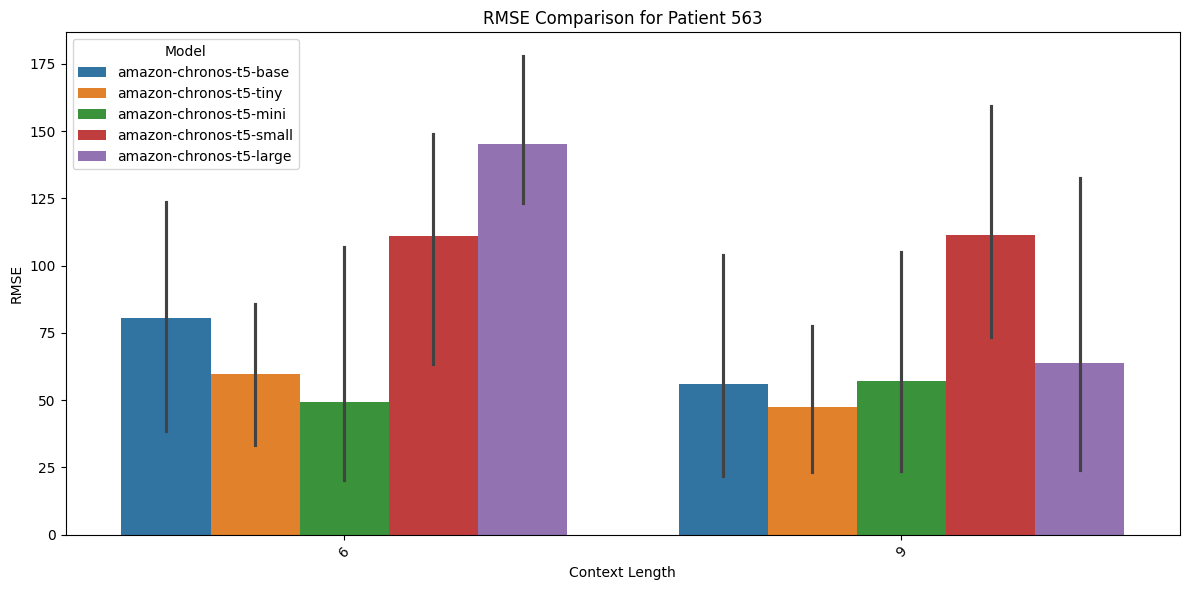

In [18]:

# Function to plot a specific metric for a given patient
def plot_patient_metrics(patient_id, metric="rmse"):
    # Filter the dataframe for the given patient ID
    patient_df = df[df["patient_id"] == patient_id]

    if patient_df.empty:
        print(f"No results found for patient {patient_id}.")
        return

    # Convert relevant columns to numeric
    patient_df[metric] = pd.to_numeric(patient_df[metric])

    # Sort values for better visualization
    patient_df = patient_df.sort_values(by=metric)

    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Plot metric vs. different configurations
    sns.barplot(
        data=patient_df,
        x="context_length",
        y=metric,
        hue="model",
        dodge=True
    )

    # Add title and labels
    plt.title(f"{metric.upper()} Comparison for Patient {patient_id}")
    plt.xlabel("Context Length")
    plt.ylabel(metric.upper())
    plt.xticks(rotation=45)

    # Show the plot
    plt.legend(title="Model")
    plt.tight_layout()
    plt.show()

# Example: Run for Patient 563 and plot RMSE
plot_patient_metrics(563, metric="rmse")


/tmp/ipykernel_65443/3789765929.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_df[metric] = pd.to_numeric(patient_df[metric])
/tmp/ipykernel_65443/3789765929.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_df["config"] = patient_df.apply(lambda row: f"{row['model']}, {row['dtype']}, {row['mode']}, ctx={row['context_length']}, pred={row['prediction_length']}", axis=1)
/tmp/ipykernel_65443/3789765929.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

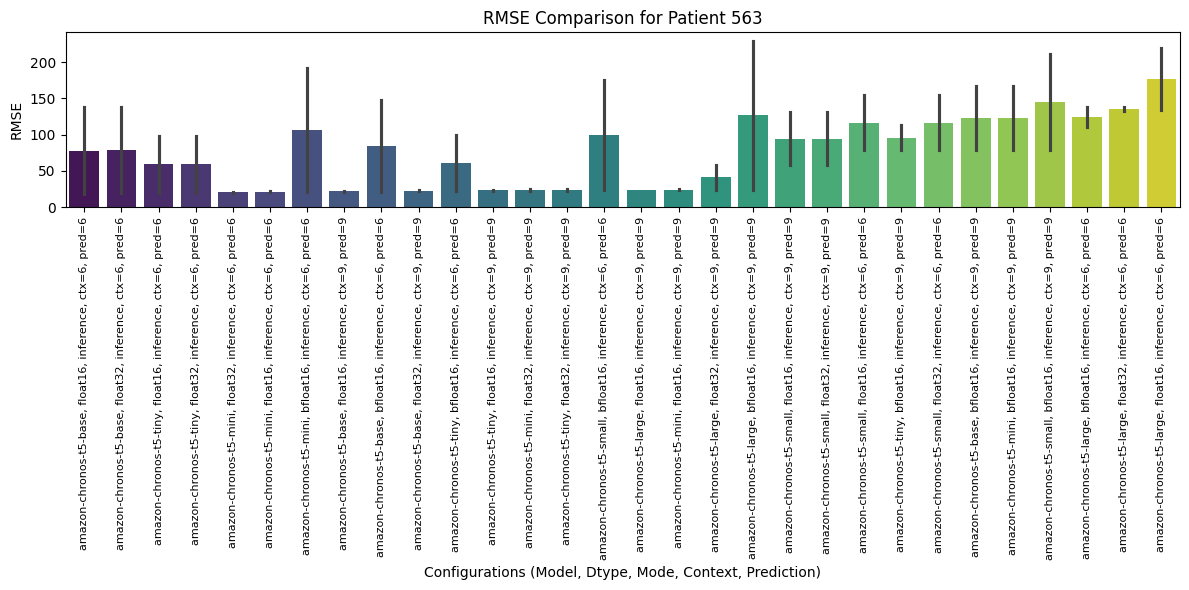

In [19]:


# Function to plot a specific metric for a given patient
def plot_patient_metrics(patient_id, metric="rmse"):
    # Filter the dataframe for the given patient ID
    patient_df = df[df["patient_id"] == patient_id]

    if patient_df.empty:
        print(f"No results found for patient {patient_id}.")
        return

    # Convert metric column to numeric
    patient_df[metric] = pd.to_numeric(patient_df[metric])

    # Create a new column to represent each unique config as a string
    patient_df["config"] = patient_df.apply(lambda row: f"{row['model']}, {row['dtype']}, {row['mode']}, ctx={row['context_length']}, pred={row['prediction_length']}", axis=1)

    # Sort values by the metric (ascending for better readability)
    patient_df = patient_df.sort_values(by=metric)

    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Plot metric vs. different configurations
    sns.barplot(
        data=patient_df,
        x="config",
        y=metric,
        palette="viridis"
    )

    # Add title and labels
    plt.title(f"{metric.upper()} Comparison for Patient {patient_id}")
    plt.xlabel("Configurations (Model, Dtype, Mode, Context, Prediction)")
    plt.ylabel(metric.upper())
    plt.xticks(rotation=90, fontsize=8)  # Rotate labels for readability

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example: Run for Patient 563 and plot RMSE
plot_patient_metrics(563, metric="rmse")


In [21]:
# Convert relevant columns to numeric
df["rmse"] = pd.to_numeric(df["rmse"])
df["mae"] = pd.to_numeric(df["mae"])
df["mape"] = pd.to_numeric(df["mape"])

# Define the parameters to analyze
parameters = ["seed", "model", "dtype", "mode", "context_length", "prediction_length"]

# Dictionary to store the best value for each parameter
best_params = {}

# Iterate over each parameter
for param in parameters:
    best_param = {}

    for metric in ["rmse", "mae", "mape"]:
        # Group by the parameter and calculate the mean for each metric
        grouped = df.groupby(param)[metric].mean()
        
        # Find the best value (the one with the lowest metric)
        best_value = grouped.idxmin()
        best_score = grouped.min()

        # Store the result
        best_param[metric] = (best_value, best_score)

    best_params[param] = best_param

# Print the best parameters for each metric
print("\n📊 **Best Configurations for Each Parameter**\n")
for param, metrics in best_params.items():
    print(f"🔹 **Best {param}:**")
    for metric, (best_value, best_score) in metrics.items():
        print(f"  - Best for {metric}: **{best_value}** ({metric} = {best_score:.4f})")
    print()




📊 **Best Configurations for Each Parameter**

🔹 **Best seed:**
  - Best for rmse: **2022** (rmse = 53.2275)
  - Best for mae: **2022** (mae = 19.9899)
  - Best for mape: **2022** (mape = 0.1299)

🔹 **Best model:**
  - Best for rmse: **amazon-chronos-t5-mini** (rmse = 51.7061)
  - Best for mae: **amazon-chronos-t5-base** (mae = 19.2357)
  - Best for mape: **amazon-chronos-t5-base** (mape = 0.1241)

🔹 **Best dtype:**
  - Best for rmse: **float32** (rmse = 58.6160)
  - Best for mae: **float32** (mae = 19.5385)
  - Best for mape: **float32** (mape = 0.1264)

🔹 **Best mode:**
  - Best for rmse: **inference** (rmse = 67.6449)
  - Best for mae: **inference** (mae = 20.7278)
  - Best for mape: **inference** (mape = 0.1330)

🔹 **Best context_length:**
  - Best for rmse: **6** (rmse = 67.2331)
  - Best for mae: **6** (mae = 18.6028)
  - Best for mape: **6** (mape = 0.1184)

🔹 **Best prediction_length:**
  - Best for rmse: **6** (rmse = 67.2331)
  - Best for mae: **6** (mae = 18.6028)
  - Best f

In [22]:


# Convert relevant columns to numeric
df["rmse"] = pd.to_numeric(df["rmse"])
df["mae"] = pd.to_numeric(df["mae"])
df["mape"] = pd.to_numeric(df["mape"])

# Sort by RMSE (you can also sort by an aggregate score)
df_sorted = df.sort_values(by=["rmse", "mae", "mape"])

# Select the top 20% best configurations (adjustable)
top_n_percent = 0.2
top_n = int(len(df_sorted) * top_n_percent)
top_df = df_sorted.head(top_n)

# Define the parameters to analyze
parameters = ["seed", "model", "dtype", "mode", "context_length", "prediction_length"]

# Dictionary to store the best value for each parameter within the best configurations
best_params = {}

# Iterate over each parameter
for param in parameters:
    best_param = {}

    for metric in ["rmse", "mae", "mape"]:
        # Group by the parameter and calculate the mean for each metric **only within the top configurations**
        grouped = top_df.groupby(param)[metric].mean()

        # Find the best value (the one with the lowest metric)
        best_value = grouped.idxmin()
        best_score = grouped.min()

        # Store the result
        best_param[metric] = (best_value, best_score)

    best_params[param] = best_param

# Print the best parameters for each metric based on the best configurations
print("\n📊 **Best Configurations Based on Top Results**\n")
for param, metrics in best_params.items():
    print(f"🔹 **Best {param}:**")
    for metric, (best_value, best_score) in metrics.items():
        print(f"  - Best for {metric}: **{best_value}** ({metric} = {best_score:.4f})")
    print()



📊 **Best Configurations Based on Top Results**

🔹 **Best seed:**
  - Best for rmse: **2021** (rmse = 21.8985)
  - Best for mae: **2021** (mae = 14.4962)
  - Best for mape: **2022** (mape = 0.0972)

🔹 **Best model:**
  - Best for rmse: **amazon-chronos-t5-base** (rmse = 21.2598)
  - Best for mae: **amazon-chronos-t5-base** (mae = 13.9093)
  - Best for mape: **amazon-chronos-t5-base** (mape = 0.0941)

🔹 **Best dtype:**
  - Best for rmse: **bfloat16** (rmse = 21.9780)
  - Best for mae: **float16** (mae = 14.4545)
  - Best for mape: **float16** (mape = 0.0974)

🔹 **Best mode:**
  - Best for rmse: **inference** (rmse = 22.0946)
  - Best for mae: **inference** (mae = 14.5554)
  - Best for mape: **inference** (mape = 0.0990)

🔹 **Best context_length:**
  - Best for rmse: **6** (rmse = 21.7653)
  - Best for mae: **6** (mae = 14.2948)
  - Best for mape: **6** (mape = 0.0988)

🔹 **Best prediction_length:**
  - Best for rmse: **6** (rmse = 21.7653)
  - Best for mae: **6** (mae = 14.2948)
  - Bes